In [ ]:
# Import necessary libraries

In [ ]:
#pip install yfinance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf

In [ ]:
# Step 1: Download Stock Data

In [2]:
start = '2005-01-01'
end = '2024-11-01'
stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-03,5.030750,5.053830,4.850824,4.898969,636143518
2005-01-04,4.826998,5.036209,4.801684,4.998239,552298420
2005-01-05,4.802429,4.886560,4.770662,4.800940,330698912
2005-01-06,4.679335,4.861743,4.658736,4.841392,417041336
2005-01-07,4.810867,4.820795,4.685042,4.731203,387964757
...,...,...,...,...,...
2024-10-25,166.800766,167.210290,165.042751,165.177608,14566400
2024-10-28,168.149231,170.412670,165.602118,170.396681,20858300


In [4]:
# Step 2: Create DataFrame and Reset Index

In [5]:
df = pd.DataFrame(data)
df.reset_index(inplace=True)
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2005-01-03,5.030750,5.053830,4.850824,4.898969,636143518
1,2005-01-04,4.826998,5.036209,4.801684,4.998239,552298420
2,2005-01-05,4.802429,4.886560,4.770662,4.800940,330698912
3,2005-01-06,4.679335,4.861743,4.658736,4.841392,417041336
4,2005-01-07,4.810867,4.820795,4.685042,4.731203,387964757
...,...,...,...,...,...,...
4987,2024-10-25,166.800766,167.210290,165.042751,165.177608,14566400
4988,2024-10-28,168.149231,170.412670,165.602118,170.396681,20858300
4989,2024-10-29,170.946060,171.665245,168.468875,169.193044,28916100


In [6]:
# Step 3: Add Moving Averages

In [7]:
df['MA_100'] = df['Close'].rolling(100).mean()
df['MA_200'] = df['Close'].rolling(200).mean()

In [8]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,,
0,2005-01-03,5.030750,5.053830,4.850824,4.898969,636143518,NaN,NaN
1,2005-01-04,4.826998,5.036209,4.801684,4.998239,552298420,NaN,NaN
2,2005-01-05,4.802429,4.886560,4.770662,4.800940,330698912,NaN,NaN
3,2005-01-06,4.679335,4.861743,4.658736,4.841392,417041336,NaN,NaN
4,2005-01-07,4.810867,4.820795,4.685042,4.731203,387964757,NaN,NaN
...,...,...,...,...,...,...,...,...
4987,2024-10-25,166.800766,167.210290,165.042751,165.177608,14566400,170.039329,162.157202
4988,2024-10-28,168.149231,170.412670,165.602118,170.396681,20858300,169.956461,162.282170
4989,2024-10-29,170.946060,171.665245,168.468875,169.193044,28916100,169.888807,162.418282


In [9]:
# Step 4: Split Data into Train and Test
# Reserve the last 100 records as test data

In [10]:
train = pd.DataFrame(df['Close'][0:len(df) - 100])
test = pd.DataFrame(df['Close'][len(df) - 100:])

In [11]:
# Step 5: Scale Data for LSTM

In [12]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [13]:
# Step 6: Prepare Training Data

In [14]:
x_train, y_train = [], []
for i in range(100, len(train_scaled)):
    x_train.append(train_scaled[i-100:i])
    y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape

(4792, 100, 1)

In [16]:
# Step 7: Build the LSTM Model

In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Step 8: Train the Model

In [19]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 104ms/step - loss: 0.0321
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - loss: 0.0020
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0017
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0018
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0015
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0015
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0014
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0014
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0014
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0012
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0012
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0011
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0012
Epoch 14/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0012
Epoch 15/50
150/150 ━━━━━━━━━

In [20]:
y_pred_train = model.predict(x_train)

150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step


In [21]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train,y_pred_train)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(mse)

In [23]:
print(train_r2)
print(train_rmse)

0.9777443761229438
0.03582694713794065


In [24]:
# Step 9: Prepare Test Data

In [25]:
past_100_days = train.tail(100)
final_test_data = pd.concat([past_100_days, test], ignore_index=True)
final_test_scaled = scaler.transform(final_test_data)


In [26]:
x_test = []
y_test = []
for i in range(100, len(final_test_scaled)):
    x_test.append(final_test_scaled[i-100:i])
    y_test.append(final_test_scaled[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [27]:
# Step 10: Make Predictions

In [28]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step


In [29]:
# Step 11: Evaluate the Model

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

test_r2 = r2_score(y_test,y_pred)

mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [32]:
print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R2_Score:{test_r2}")


Mean Squared Error (MSE): 418.5071122281788
Mean Absolute Error (MAE): 19.53483352661133
Mean Absolute Percentage Error (MAPE): 11.39%
R2_Score:-3.2438715747822497


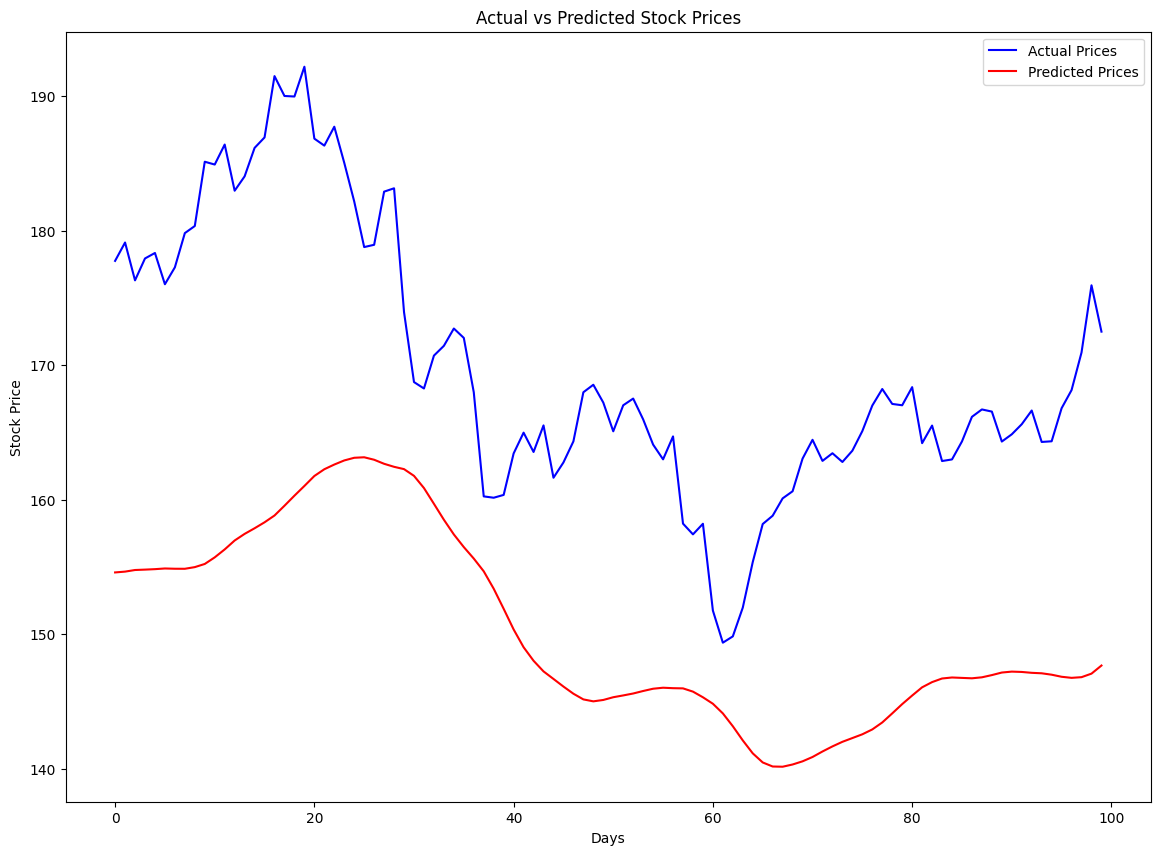

In [33]:
# Step 12: Plot Results
plt.figure(figsize=(14, 10))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

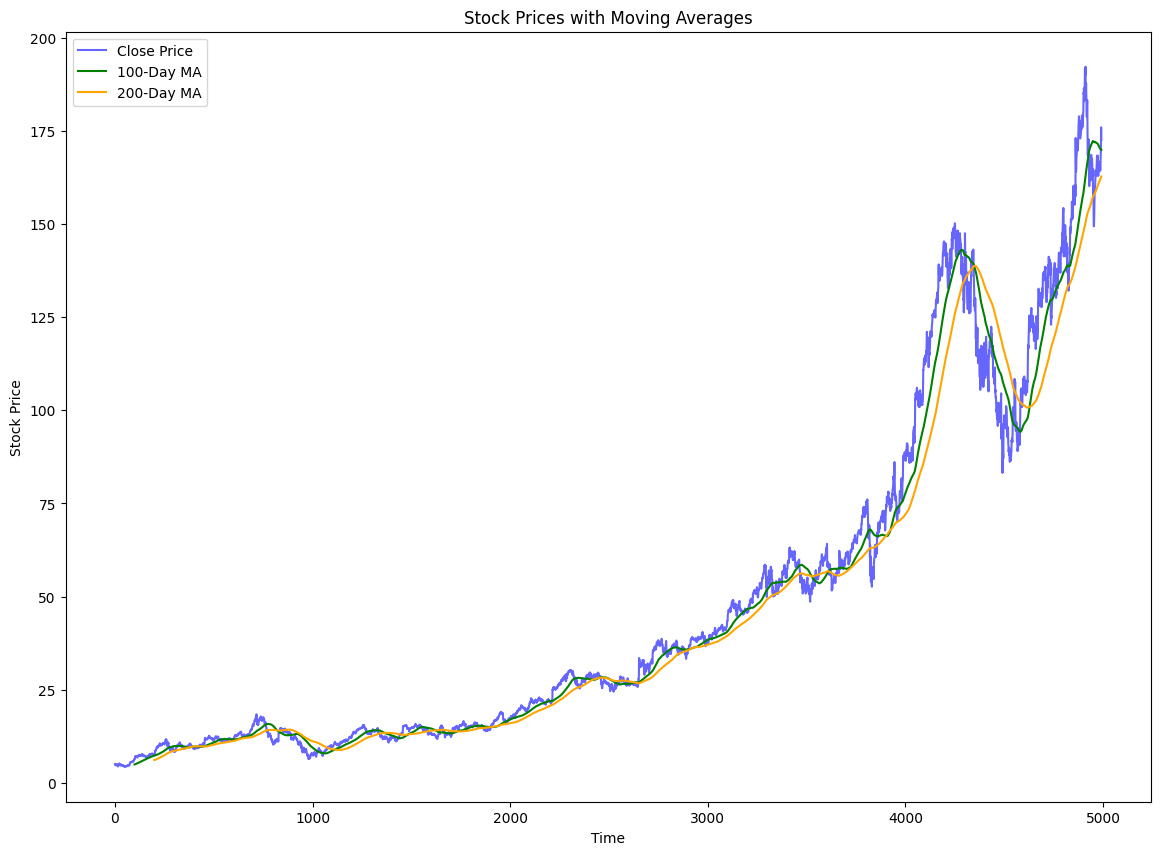

In [34]:
# Step 13: Plot with Moving Averages
plt.figure(figsize=(14, 10))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df['MA_100'], label='100-Day MA', color='green')
plt.plot(df['MA_200'], label='200-Day MA', color='orange')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:
# Predict future stock prices (e.g., the next 30 days)

In [36]:

last_100_days = df['Close'][-100:].values
future_predictions = []

for _ in range(30):
    scaled_last_100_days = scaler.transform(last_100_days.reshape(-1, 1)).reshape(1, 100, 1)
    next_day_prediction = model.predict(scaled_last_100_days)
    next_day_prediction = scaler.inverse_transform(next_day_prediction)
    future_predictions.append(next_day_prediction[0, 0])
    last_100_days = np.append(last_100_days[1:], next_day_prediction[0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [37]:
# Plot future predictions

In [38]:
# Generate future dates for prediction
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]  # Get the last date from the DataFrame index
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

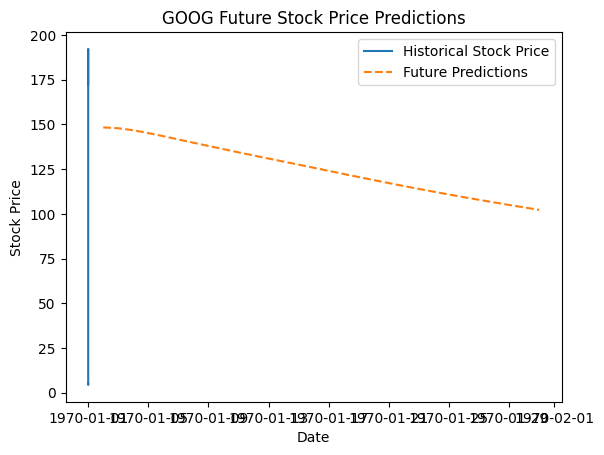

In [39]:
plt.plot(df['Close'], label='Historical Stock Price')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title(f'{stock} Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [40]:
import joblib

# Save the trained model to a file
model_filename = 'stock_prediction_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as stock_prediction_model.pkl


In [41]:
model.save('Stock_price_prediction.keras')

In [42]:
future_predictions

[148.29674,
 147.8437,
 146.71782,
 145.14902,
 143.3986,
 141.579,
 139.75774,
 137.94919,
 136.15306,
 134.36536,
 132.61337,
 130.8938,
 129.18909,
 127.47902,
 125.751976,
 124.015526,
 122.28082,
 120.55847,
 118.8569,
 117.18208,
 115.537796,
 113.92622,
 112.34982,
 110.80767,
 109.299835,
 107.82605,
 106.384834,
 104.97335,
 103.58778,
 102.224]